<a href="https://colab.research.google.com/github/GeorgeKMaina/Autolib-Car-Analysis-and-Hypotheis-Testing/blob/main/Autolib_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTOLIB CAR SHARING SERVICES ANALYSIS

### 1. Defining the research question

We will work as Data Scientist for Autolib which a company that provides car sharing services in France. Autolib has anout 104 stations where people can pick and drop the hired cars.

The main aim of this project is to establish which day of the week are most cars picked and returned.
We will also try to establish if there is any statistical difference between the number of cars that are picked and returned.

#### a) Specyfying the Data Analytic Questions

1. Are most cars picked during the weekdays or during the weekends?
2. Is the number of cars taken and those returned equal?

b) Stating the hypothesis 

1. For the first question, the hypothesis will be:

H0: The mean of cars taken during the weekends and weekdays are the same

H1: The mean of cars taken during the weekend s and weekdays are different

2. For the second question, the hypotheis will be:

H0= the means of the two columns are equal

H1: The means of the two columns are not equal

c) Stating the decision Rule

If p-value is less than 0.05, reject the null hypothesis

### 2. Recording the Experimental Design

a) Coming up with research question

b) Cleaning the dataset by deleting outliers, remaing messy column names and dropping observations with anomalies

c) Carrying out univariate and bivariate analysis and making the respective plots

d) Implement the solution by performing hypothesis testing

### 3. Metric of Success

To draw conclusion from the hypothesis tests that we will perform

### 4. Relevance of the Dataset

The dataset is of daily records of the number of cars picked or returned at the various stations owned by autolib. The data covers  a period of six months from the month of January to July of 2018.

The dataset has the necessary features that will enable us to achieve our objectives

# Importing the libraries we will use in the project

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import ttest_ind

Loading the dataset

In [2]:
autolib=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


preview of the dataset

In [3]:
print('shape of the dataset',autolib.shape)
print('the dataset has ' + str(autolib.shape[0]) + ' rows and ' + str(autolib.shape[1]) +' columns' )

shape of the dataset (16085, 13)
the dataset has 16085 rows and 13 columns


In [4]:
# the first 5 rows
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
# last 5 rows
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


We will filter the dataset to remain with our rows and columns of interest

we are not interested in all the columns in this dataset

Our columns of interest are the Postal code,	date,day of the Week,	type of day,sum	of blue cars taken and sum of blue cars returned.

Also, there are 104 stations some of which do not have many visits. Because of this, I settled to analyze the two stations with highest frequency of visits.

In [6]:
# since we are not interested in all the 104 stations, we will try and look at the the two sations with the highest average
print('***** average of cars taken *****')
print(autolib.groupby('Postal code')['BlueCars_taken_sum'].mean().nlargest())

print('***** sum of cars taken *****')
autolib.groupby('Postal code')['BlueCars_taken_sum'].sum().nlargest()

***** average of cars taken *****
Postal code
75015    896.955128
75016    790.301282
75017    734.493590
75013    541.596154
75019    525.467949
Name: BlueCars_taken_sum, dtype: float64
***** sum of cars taken *****


Postal code
75015    139925
75016    123287
75017    114581
75013     84489
75019     81973
Name: BlueCars_taken_sum, dtype: int64

In [7]:
#we will take the first two stations which are 75015 and 75016 respectively
df= autolib["Postal code"].isin(["75015","75016"])
df=autolib[df]
df1=df[['Postal code','date','BlueCars_taken_sum','BlueCars_returned_sum','dayOfWeek','day_type']]
df1.head()

,Postal code,date,BlueCars_taken_sum,BlueCars_returned_sum,dayOfWeek,day_type
2184,75015,1/1/2018,781,843,0,weekday
2185,75015,1/2/2018,710,720,1,weekday
2186,75015,1/3/2018,739,752,2,weekday
2187,75015,1/4/2018,669,644,3,weekday
2188,75015,1/5/2018,852,846,4,weekday


In [8]:
#to have a brief summary of the data columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 2184 to 2495
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            312 non-null    int64 
 1   date                   312 non-null    object
 2   BlueCars_taken_sum     312 non-null    int64 
 3   BlueCars_returned_sum  312 non-null    int64 
 4   dayOfWeek              312 non-null    int64 
 5   day_type               312 non-null    object
dtypes: int64(4), object(2)
memory usage: 17.1+ KB


# Data Cleaning

1. Consistency

In [9]:
print('number of rows with duplicate records: ',df.duplicated().sum())

number of rows with duplicate records:  0


There is no instance of duplicated records

2. Completeness

In [10]:
df1.isna().sum()

Postal code              0
date                     0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dayOfWeek                0
day_type                 0
dtype: int64

There are no null values in the columns

3. Validity

- we will look at our columns of interest to ensure that they are consistent and have no outlier values

We will first check to ensure that no column has a sum of zero.

In [11]:
# we will look for anomalies in this column. We will try to find if there are any stations that had zero cars picked from or returned.
print('number of rows in the dataset where there were either zero cars picked or droped : ', df1.loc[(df1['BlueCars_taken_sum']==0) | (df1['BlueCars_returned_sum']==0)].shape)
df1.loc[(df1['BlueCars_returned_sum']==0) | (df1['BlueCars_taken_sum']==0)]

#we establish that there are five rows where there were no cars picked or returned

number of rows in the dataset where there were either zero cars picked or droped :  (0, 6)


,Postal code,date,BlueCars_taken_sum,BlueCars_returned_sum,dayOfWeek,day_type


We will check if there are outliers in the two columns

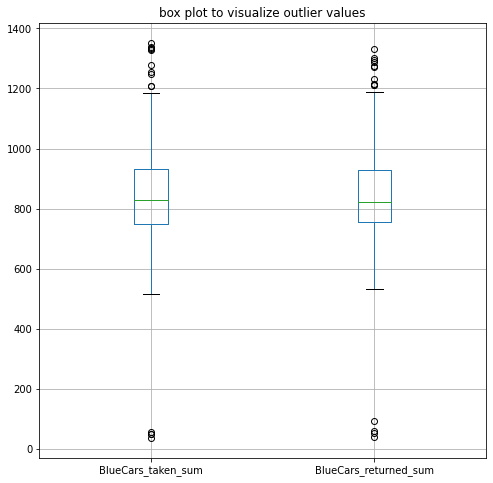

In [12]:
#we will first look if the columns have outlier values
#outlier detection
# the columns that we will use are BlueCars_taken_sum and BlueCars_returned_sum
numerical=df1[['BlueCars_taken_sum','BlueCars_returned_sum']]
numerical.boxplot(figsize=(8,8))
plt.title('box plot to visualize outlier values')
plt.show()

In [13]:
df1.loc[(df1['BlueCars_taken_sum']<500) | (df1['BlueCars_returned_sum']<500)]

,Postal code,date,BlueCars_taken_sum,BlueCars_returned_sum,dayOfWeek,day_type
2238,75015,2/24/2018,58,93,5,weekend
2339,75015,6/19/2018,49,52,1,weekday
2394,75016,2/24/2018,49,60,5,weekend
2495,75016,6/19/2018,36,40,1,weekday


In [14]:
df1.loc[(df1['BlueCars_taken_sum']>1100) | (df1['BlueCars_returned_sum']>1100)]

,Postal code,date,BlueCars_taken_sum,BlueCars_returned_sum,dayOfWeek,day_type
2196,75015,1/13/2018,1255,1211,5,weekend
2197,75015,1/14/2018,1097,1135,6,weekend
2203,75015,1/20/2018,1352,1300,5,weekend
2204,75015,1/21/2018,1132,1149,6,weekend
2210,75015,1/27/2018,1248,1214,5,weekend
2217,75015,2/3/2018,1327,1287,5,weekend
2218,75015,2/4/2018,1043,1118,6,weekend
2224,75015,2/10/2018,1118,1136,5,weekend
2231,75015,2/17/2018,1144,1117,5,weekend
2242,75015,3/3/2018,1136,1118,5,weekend


In [15]:
# to drop the outlier values 
df1.drop(df1.loc[(df1['BlueCars_taken_sum']>1100) | (df1['BlueCars_returned_sum']>1100)].index,inplace=True)
df1.drop(df1.loc[(df1['BlueCars_taken_sum']<600) | (df1['BlueCars_returned_sum']<600)].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


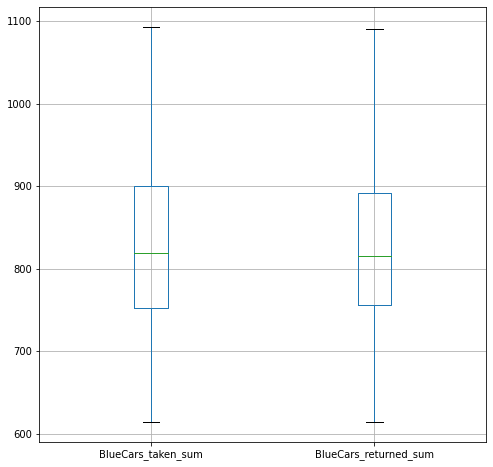

In [16]:
#to confirm if the outliers have been deleted
numerical=df1[['BlueCars_taken_sum','BlueCars_returned_sum']]
numerical.boxplot(figsize=(8,8))
plt.show()

Data Type conversion

In [17]:
df1['date']=pd.to_datetime(df1['date'])
df1['day_type']=pd.Categorical(df1['day_type'])
df1['dayOfWeek']=pd.Categorical(df1['dayOfWeek'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [18]:
# to confirm if the data type transfromation has been done
df1.dtypes

Postal code                       int64
date                     datetime64[ns]
BlueCars_taken_sum                int64
BlueCars_returned_sum             int64
dayOfWeek                      category
day_type                       category
dtype: object

4. Uniformity

In [19]:
df1.rename(columns={'Postal code':'Postal_code', 'dayOfWeek':'DayOfTheWeek'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
#to confirm if the renaming has been done
df1.columns

Index(['Postal_code', 'date', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'DayOfTheWeek', 'day_type'],
      dtype='object')

# EDA

## 1. Univariate analysis

### Postal code

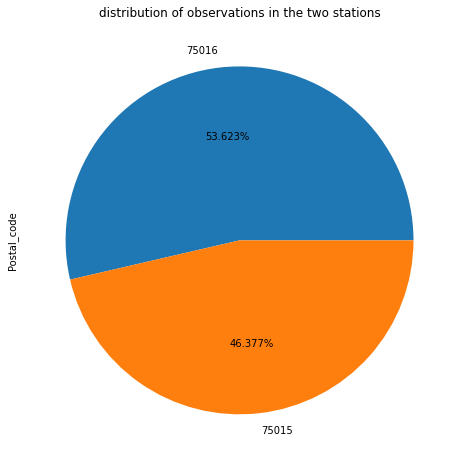

In [21]:
df1['Postal_code'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.3f%%')
plt.title('distribution of observations in the two stations')
plt.show()

- we can see that both stations have the same number of observations

### Numerical Fields

To check on the distribution of the numerical columns

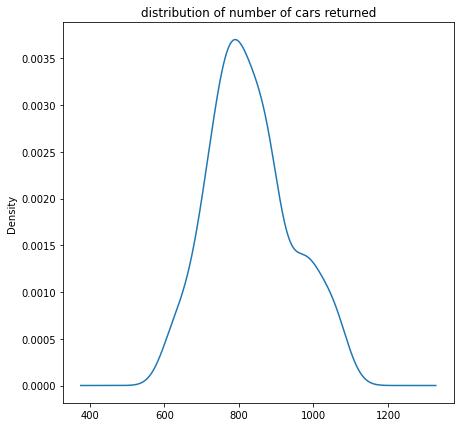

In [22]:
# distribution of number of cars returned
df1.BlueCars_returned_sum.plot(kind='kde',figsize=(7,7))
plt.title('distribution of number of cars returned')
plt.show()

In [23]:
# to check on the statistical attributes of this column
print('kurtosis of the number of cars taken: ',df1['BlueCars_returned_sum'].kurt())
print('skewness of the number of cars taken: ',df1['BlueCars_returned_sum'].skew())

# the skewness and kurtosis suggest that the column is not normally distributed
print('\n')
print('skewness of normal distribution is 0')
print('kurtosis of a normal distribution is 3')
# we will perform the shapiro test to look if the column is normally distributed

kurtosis of the number of cars taken:  -0.41267013709486244
skewness of the number of cars taken:  0.3540690121618152


skewness of normal distribution is 0
kurtosis of a normal distribution is 3


In [24]:
from scipy.stats import shapiro
stats,p=shapiro(df1['BlueCars_returned_sum'])

print('statistic=%.3f,p=%.3f'%(stats,p))

#decision rule
alpha=0.05
if p>alpha:
  print(' data is normally distributed')
else:
  print('data is not normally distributed')

statistic=0.977,p=0.000
data is not normally distributed


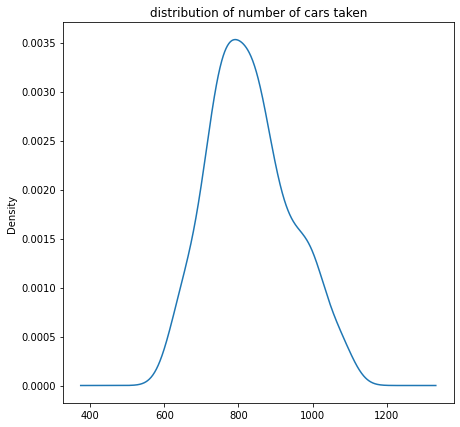

In [25]:
# distribution of number of cars taken
df1.BlueCars_taken_sum.plot(kind='kde',figsize=(7,7))
plt.title('distribution of number of cars taken')
plt.show()

In [26]:
#we will look at the statistical attributes of this column
print('kurtosis of the blue cars taken',df1['BlueCars_taken_sum'].kurt())
print('skweness of the blue cars taken',df1['BlueCars_taken_sum'].skew())

# the skewness and kurtosis suggest that the column is not normally distributed
print('\n')
print('skewness of normal distribution is 0')
print('kurtosis of a normal distribution is 3')
# we will perform the shapiro test to look if the column is normally distributed

kurtosis of the blue cars taken -0.46672193306334897
skweness of the blue cars taken 0.34747077346514477


skewness of normal distribution is 0
kurtosis of a normal distribution is 3


In [27]:
# conducting the shapiro test for normality
from scipy.stats import shapiro
stats,p=shapiro(df1['BlueCars_taken_sum'])

print('statistics=%.3f,p=%.3f '%(stats,p))

alpha=0.05
if p>alpha:
  print('data is normally distributed')
else:
  print('data is not normally distributed')

statistics=0.980,p=0.001 
data is not normally distributed


### Day Of The Week

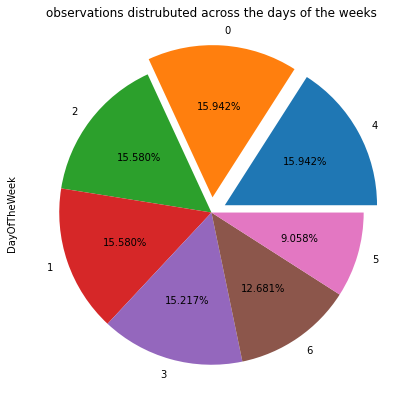

In [28]:
explode=[0.1,0.1,0,0,0,0,0]
df1['DayOfTheWeek'].value_counts().plot(kind='pie',figsize=(7,7), autopct='%1.3f%%',explode=explode)
plt.title('observations distrubuted across the days of the weeks')
plt.show()

- In all the days, the number of observations were 44
- In day 0 and 1, is when there were more 46 records made

- this shows that there is no unequal distribution of observations between the days of the weeks
- this reduces the instances of biasness

### Day Type

In [29]:
print('**** number of observations btwn weekdays and weekends ****')
autolib['day_type'].value_counts()

**** number of observations btwn weekdays and weekends ****


weekday    11544
weekend     4541
Name: day_type, dtype: int64

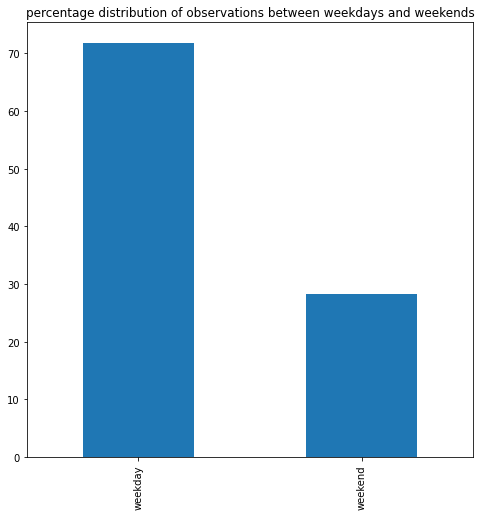

In [30]:
(autolib['day_type'].value_counts()/len(autolib['day_type'])*100).plot(kind='bar',figsize=(8,8))
plt.title('percentage distribution of observations between weekdays and weekends')
plt.show()

- most observations were made in weekends than during weekends
- this is normal since there are more weekdays than weekends

## Bivariate Analysis

#### Numerical Variables




- the numerical variables are BlueCars_taken_sum & BlueCars_returned_sum

In [31]:
df1[['BlueCars_taken_sum','BlueCars_returned_sum']].corr()

# to visualize this,we will use a correlation heatmap

,BlueCars_taken_sum,BlueCars_returned_sum
BlueCars_taken_sum,1.000000,0.970512
BlueCars_returned_sum,0.970512,1.000000


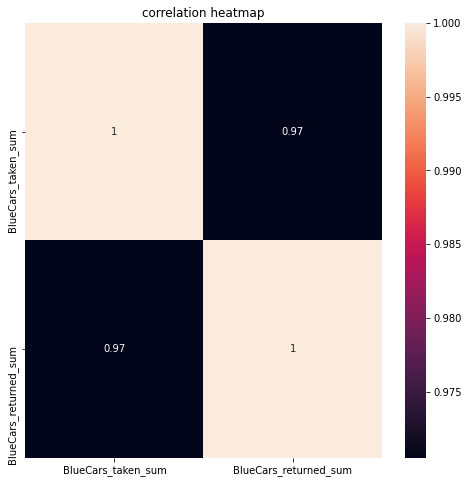

In [32]:
plt.figure(figsize=(8,8))
plt.title('correlation heatmap')
sns.heatmap(df1[['BlueCars_taken_sum','BlueCars_returned_sum']].corr(),vmax=1,annot=True)
plt.show()

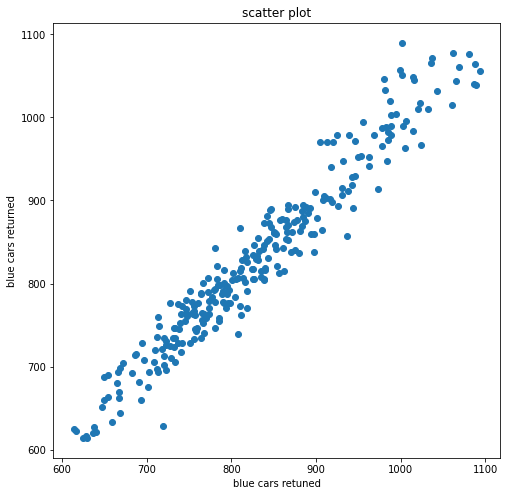

In [33]:
a=df1['BlueCars_taken_sum']
b=df1['BlueCars_returned_sum']
plt.figure(figsize=(8,8))
plt.scatter(a,b)
plt.title('scatter plot')
plt.ylabel('blue cars returned')
plt.xlabel('blue cars retuned')
plt.show()

- we can see that the two numerical columns are closely correlated
- the correlation is positive

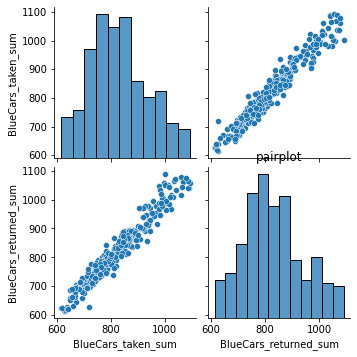

In [34]:
sns.pairplot(numerical)
plt.title('pairplot')
plt.show()

### Number of cars picked vs number of cars returned

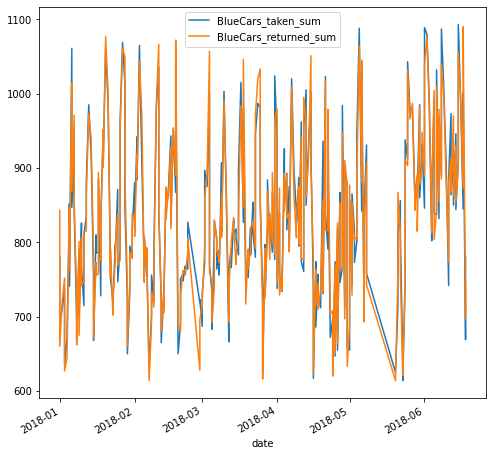

In [35]:
numerical=df1[['date','BlueCars_taken_sum','BlueCars_returned_sum']]
numerical.set_index('date')
numerical.plot(x='date',figsize=(8,8))
plt.show()

#### Postal Code vs Sum of Blue Cars Taken

In [36]:
df1.groupby('Postal_code')['BlueCars_taken_sum'].sum()

Postal_code
75015    109508
75016    119786
Name: BlueCars_taken_sum, dtype: int64

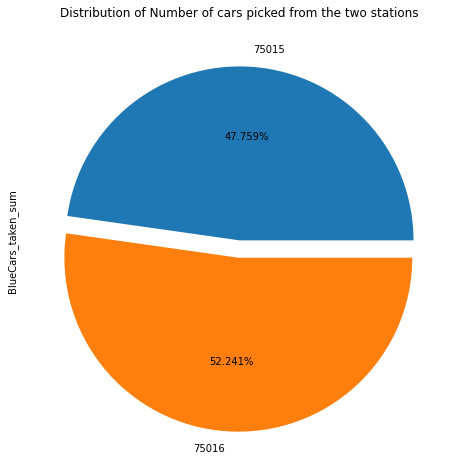

In [37]:
explode=[0,0.1]
df1.groupby('Postal_code')['BlueCars_taken_sum'].sum().plot(kind='pie',figsize=(8,8),autopct='%1.3f%%',explode=explode)
plt.title('Distribution of Number of cars picked from the two stations')
plt.show()

- More cars were picked from the station *75015*

#### Postal Adress vs BlueCars_returned_sum

In [38]:
df1.groupby('Postal_code')['BlueCars_returned_sum'].sum()

Postal_code
75015    109503
75016    119679
Name: BlueCars_returned_sum, dtype: int64

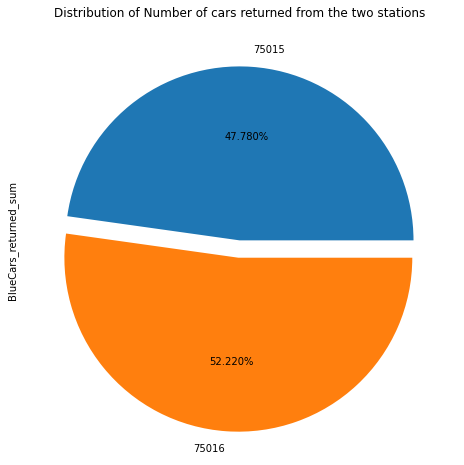

In [39]:
explode=[0,0.1]
df1.groupby('Postal_code')['BlueCars_returned_sum'].sum().plot(kind='pie',figsize=(8,8),autopct='%1.3f%%',explode=explode)
plt.title('Distribution of Number of cars returned from the two stations')
plt.show()

- more cars were returned in the station *75016* 

#### Day Type

In [40]:
daytype=df1[['Postal_code','BlueCars_taken_sum','BlueCars_returned_sum','day_type']]
#'Postal code','date','BlueCars_taken_sum','BlueCars_returned_sum','dayOfWeek','day_type'
print('**** sum of cars taken and returned during weekdays and over weekend****')
print(daytype.groupby(['Postal_code','day_type']).sum())
print('\n **** average of cars taken and returned during weekdays and over weekend ****')
print(daytype.groupby(['Postal_code','day_type']).mean())

**** sum of cars taken and returned during weekdays and over weekend****
                      BlueCars_taken_sum  BlueCars_returned_sum
Postal_code day_type                                           
75015       weekday                92049                  91595
            weekend                17459                  17908
75016       weekday                81352                  81113
            weekend                38434                  38566

 **** average of cars taken and returned during weekdays and over weekend ****
                      BlueCars_taken_sum  BlueCars_returned_sum
Postal_code day_type                                           
75015       weekday           836.809091             832.681818
            weekend           969.944444             994.888889
75016       weekday           767.471698             765.216981
            weekend           915.095238             918.238095


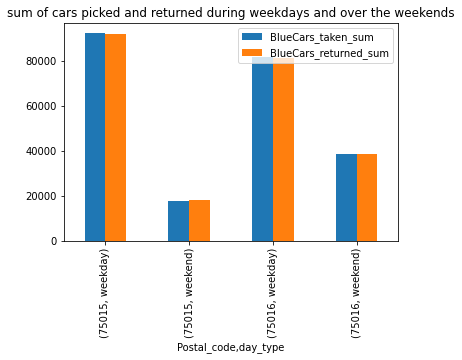

In [41]:
su=a=daytype.groupby(['Postal_code','day_type']).sum()
su.plot(kind='bar')
plt.title('sum of cars picked and returned during weekdays and over the weekends')
plt.show()

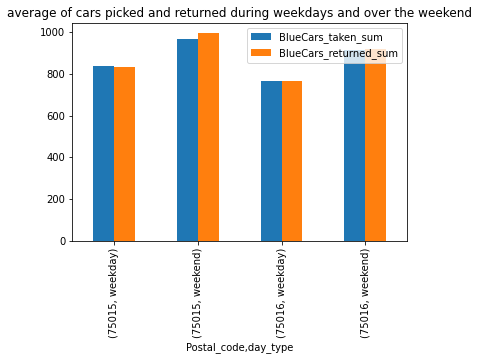

In [42]:
av=daytype.groupby(['Postal_code','day_type']).mean()
av.plot(kind='bar')
plt.title('average of cars picked and returned during weekdays and over the weekend')
plt.show()

On average, more cars we picked during the weekends in both stations

#### day of the week 

In [46]:
weekday=df1[['Postal_code','BlueCars_taken_sum','BlueCars_returned_sum','DayOfTheWeek']]
weekday.groupby(['Postal_code','DayOfTheWeek']).sum()

BlueCars_taken_sum  BlueCars_returned_sum
Postal_code DayOfTheWeek                                           
75015       0                          17751                  18082
            1                          17811                  17747
            2                          17558                  17496
            3                          18323                  18235
            4                          20606                  20035
            5                           4092                   3946
            6                          13367                  13962
75016       0                          15045                  15015
            1                          15883                  15643
            2                          16843                  16689
            3                          15703                  15780
            4                          17878                  17986
            5                          20316                  20234
            6                          18118                  18332

##### how cars were picked and returned in days of the week in station 75015

In [44]:
df1.columns

Index(['Postal_code', 'date', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'DayOfTheWeek', 'day_type'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


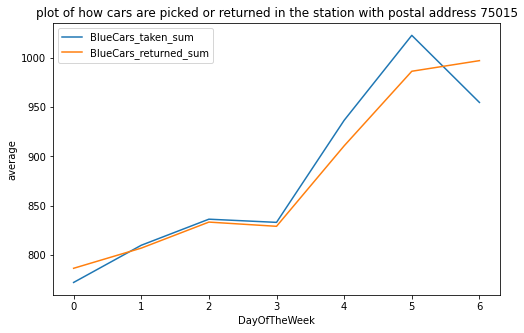

In [49]:
pcode75015=weekday.loc[weekday['Postal_code']==75015]
pcode75015.drop(['Postal_code'],axis=1,inplace=True)
pcode75015.groupby(['DayOfTheWeek']).mean().plot(figsize=(8,5))
plt.title('plot of how cars are picked or returned in the station with postal address 75015')
plt.ylabel('average')
plt.show()

##### how cars were picked and returned in days of the week in station 75016

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


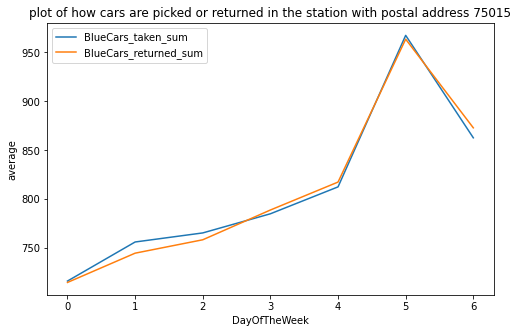

In [52]:
pcode75016=weekday.loc[weekday['Postal_code']==75016]
pcode75016.drop(['Postal_code'],axis=1,inplace=True)
pcode75016.groupby(['DayOfTheWeek']).mean().plot(figsize=(8,5))
plt.title('plot of how cars are picked or returned in the station with postal address 75015')
plt.ylabel('average')
plt.show()

### Day of the week and number of cars taken or returned jointly

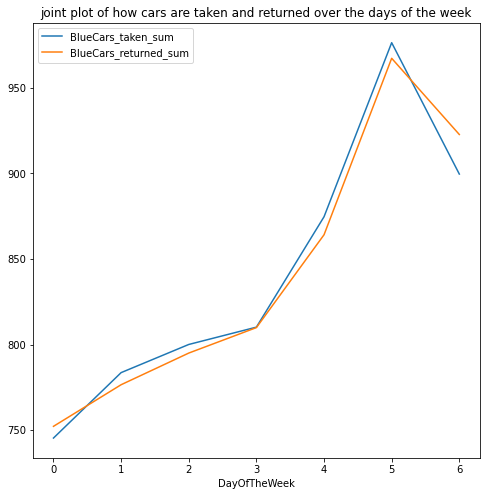

In [54]:
dayofweek=df1[['DayOfTheWeek','BlueCars_taken_sum','BlueCars_returned_sum']]
dayofweek.groupby('DayOfTheWeek').mean().plot(figsize=(8,8))
plt.title('joint plot of how cars are taken and returned over the days of the week')
plt.show()

## Hypothesis Testing

##### we will first carry out sampling on the dataset

In [55]:
sample=df1.groupby('day_type', group_keys=False).apply(lambda x: x.sample(frac=0.5))
#our strata will be the type of the day i.e either a weekend or weekday
sample

,Postal_code,date,BlueCars_taken_sum,BlueCars_returned_sum,DayOfTheWeek,day_type
2349,75016,2018-01-10,768,741,2,weekday
2481,75016,2018-06-05,839,804,1,weekday
2415,75016,2018-03-20,753,765,1,weekday
2452,75016,2018-04-26,655,664,3,weekday
2226,75015,2018-02-12,723,726,0,weekday
...,...,...,...,...,...,...
2264,75015,2018-03-25,981,1033,6,weekend
2352,75016,2018-01-13,985,973,5,weekend
2399,75016,2018-03-04,770,759,6,weekend
2292,75015,2018-04-22,925,979,6,weekend


In [56]:
sample.shape

(138, 6)

##### Is there a statistical difference between the sum of cars taken and those returned?

We will carry out a Paired t test

 - H0= the means of the two columns are equal
 - H1: The means of the two columns are not equal

Decison rule

If p-value is less than 0.05, reject the null hypothesis

In [59]:
stats.ttest_rel(sample['BlueCars_taken_sum'], sample['BlueCars_returned_sum'])

Ttest_relResult(statistic=0.442321398286554, pvalue=0.6589541522492832)

- the p-value from the the test is greater than the threshold
- This implies that the means of the columns are not equal.

##### Is there a statistical difference between the mean number of cars taken over the weekends and those taken during weekdays

- H0: The mean of cars taken during the weekends and weekdays are the same
- H1: The mean of cars taken during the weekend s and weekdays are different

Decision Rule : Reject Null if P-value< 0.05

In [60]:
weekday=sample[sample['day_type']=='weekday']
weekend=sample[sample['day_type']=='weekend']


stats.ttest_ind(weekday['BlueCars_taken_sum'],weekend['BlueCars_taken_sum'])

Ttest_indResult(statistic=-5.176903935399317, pvalue=7.933848714981643e-07)

- We will reject the null hypothesis
- rejecting the null hypothesis implies that the mean of cars taken during the weekdays and during the weekends are statistically different 

##### Is there a statistical difference between the mean number of cars returned over the weekends and those returned during weekdays

In [61]:
stats.ttest_ind(weekday['BlueCars_returned_sum'],weekend['BlueCars_returned_sum'])

Ttest_indResult(statistic=-6.171514290614284, pvalue=7.281163935900543e-09)

- We will reject the null hypothesis
- rejecting the null hypothesis implies that the mean of cars returned during the weekdays and during the weekends are statistically different